# Proyecto 1
### Regresión con código
> *Estudiante: Víctor Manuel Rodríguez Umaña*

> *Carnet: 24007670*

> *Curso: Ciencia de Datos en Python*

> Video explicativo: [https://drive.google.com/file/d/1qj8jNVa_axA6lbzC8LWAmtVXVunVQiKu/view](https://drive.google.com/file/d/1qj8jNVa_axA6lbzC8LWAmtVXVunVQiKu/view)

### _Imports de librerías y definición inicial de la clase_

Buscando la separación lógica de la clase, con finalidad pedagógica, la clase se codifica en diferentes celdas y al principio solo se hace una definición inicial, a la que posteriormente se agregan los métodos requeridos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class ProcesadorRegresionLineal:
    def __init__(self, dataset_npy):
        self.dataset = np.load(dataset_npy) #Carga el dataset

### _Separación de los datos: Entrenamiento y validación_

In [2]:
def separar_datos(self, fraccion_entrenamiento): #recibe un número decimal, que indica el porcentaje de los datos que será usado para el entrenamiento
    filas_count = self.dataset.shape[0]
    print(f"Número total de filas: {filas_count}")
    punto_corte = int(filas_count * fraccion_entrenamiento)
    self.set_entrenamiento = self.dataset[:punto_corte]
    self.set_validacion = self.dataset[punto_corte:]
    print(f"Filas para entreamiento: {self.set_entrenamiento.shape[0]}")
    print(f"Filas para validación y pruebas: {self.set_validacion.shape[0]}")
    
ProcesadorRegresionLineal.separar_datos = separar_datos

### _Análisis exploratorio de los datos_

Construcción del DataFrame de Pandas

In [3]:
def construir_dataframes(self, data_fields):
    self.df_datos = pd.DataFrame(self.set_entrenamiento, columns=data_fields)
    self.df_pruebas = pd.DataFrame(self.set_validacion, columns=data_fields)
    return self.df_datos.head(), self.df_pruebas.head()
    
ProcesadorRegresionLineal.construir_dataframes = construir_dataframes

Principales datos estadísticos e histograma para cada variable

In [4]:
def mostrar_informacion_estadistica(self):
    for col in self.df_datos:
        #obtención de datos estadísticos
        df_describe = self.df_datos[col].describe()
        print('='*80)
        print("Columna:", col)
        print('='*80)
        print("Media:", df_describe['mean'])
        minimo = df_describe['min']
        maximo = df_describe['max']
        rango = maximo - minimo
        print("Valor mínimo:", minimo)
        print("Valor máximo:", maximo)
        print("Rango:", rango)
        print("Desviación estándar:", df_describe['std'])

        #Despliegue del histograma con seaborn
        if rango <= 14: #Evita que las barras se muestren separadas en las variables con valores enteros pequeños
            sns.histplot(self.df_datos[col], binwidth=1)
        else:
            sns.histplot(self.df_datos[col])
        plt.show()

        print("\n\n")
        
ProcesadorRegresionLineal.mostrar_informacion_estadistica = mostrar_informacion_estadistica

### _Análisis de variables independientes_

Correlación entre las variables independientes y la variable dependiente 'y', y selección de las variables con mayor potencial predictivo

In [5]:
def analizar_variables_independientes(self, variable_dependiente):
    y = self.df_datos[variable_dependiente] #Extrae la variable dependiente y: El precio de venta
    independientes = self.df_datos.columns.drop(variable_dependiente) #Se crea una lista de columnas, excluye la variable dependiente 'SalePrice'

    correlaciones_xy = {} #Diccionario para almacenar los coeficientes de correlación entre cada variable independiente y la variable dependiente 'y'

    for x in independientes:
        correlacion = self.df_datos[x].corr(y) #Función de Pandas que retorna el coeficiente de correlación entre dos series de datos
        correlaciones_xy[x] = correlacion

        print('='*80)
        print("Variable independiente:", x)
        print('='*80)
        sns.scatterplot(x=self.df_datos[x], y=y)
        plt.title(f"Coeficiente de correlación: {correlacion}")
        plt.show()
    
    #Se ordenan las variables según coeficiente de correlación (descendentemente), y se obteienen las primeras 2
    var_predictivas = sorted(correlaciones_xy, key=correlaciones_xy.get, reverse=True)[:2]
    return var_predictivas

ProcesadorRegresionLineal.analizar_variables_independientes = analizar_variables_independientes

### _Función para entrenar un modelo de regresión lineal_

In [6]:
def entrenar_modelo(self, x, y, epochs, imprimir_error_cada, alfa):
    #Se crea la matriz, apilando el vector x en la primera columna, y un array de unos
    matriz = np.column_stack((x, np.ones_like(x)))
    
    #Inicialización de Beta0 y Beta1, en un vector de dos elementos, con valores aleatorios
    beta = np.random.rand(2)
    
    #n: Número de observaciones. Variable útuil para el cálculo del error o costo
    n = len(y)
    
    #Vector para el almacenamiento de los errores de cada iteración
    errores = np.zeros(epochs)
    
    #Diccionario para almacenar el modelo resultante de cada iteración
    modelos = {}
    
    for epoch in range(epochs):
        #Se usa la función dot(observación, parametro) de NumPy, que permite calcular el producto punto entre dos arrays
        y_prediccion = np.dot(matriz, beta)
        
        #Cálculo del error o costo
        error = (1 / (2 * n)) * np.sum((y - y_prediccion) ** 2)
        errores[epoch] = error
        
        #Imprimir el error para las iteracciones que son múltiplo del parámetro imprimir_error_cada
        if (epoch + 1) % imprimir_error_cada == 0:
            print(f"Error de la iteración {epoch + 1}: {error}")
        
        #Almacena el modelo del epoch antes de calcular gradiente de error y actualizar los parámetros
        modelos[epoch] = beta.copy()
            
        #Cálculo de los gradientes de error para Beta0 y Beta1
        gradientes = (1 / n) * np.dot(matriz.T, (y_prediccion - y))
        
        #Actualización de los parámetros
        beta -= alfa * gradientes
        
    return modelos, errores

ProcesadorRegresionLineal.entrenar_modelo = entrenar_modelo

### _Función para graficar el cambio de el error en el tiempo_

In [7]:
def graficar_error_en_tiempo(self, errores):
    plt.plot(errores)
    plt.xlabel("Iteración")
    plt.ylabel("Error")
    plt.title("Cambio de error en el tiempo")
    plt.show()
    
ProcesadorRegresionLineal.graficar_error_en_tiempo = graficar_error_en_tiempo

### _Función para graficar la evolución del modelo en el tiempo_

In [8]:
def graficar_evolucion_modelo(self, modelos, x, y, n):
    #Se convierten las claves del diccionario (estructura elegida) a enteros, y se ordenan
    iteraciones = sorted(map(int, modelos.keys()))
    
    plt.scatter(x, y)
    
    for i in iteraciones:
        if i % n == 0: #Igualdad que solo se cumplirá para los múltiplos de n
            beta = modelos[i]
            y_prediccion = beta[0] * x + beta[1]
            plt.plot(x, y_prediccion)
    
    plt.xlabel("Variable independiente")
    plt.ylabel("Variable dependiente")
    plt.title("Evolución del modelo en el tiempo")
    plt.show()
    
ProcesadorRegresionLineal.graficar_evolucion_modelo = graficar_evolucion_modelo

# Uso de la clase ProcesadorRegresionLineal

### _Carga y separación de datos_

In [9]:
procesador_rl = ProcesadorRegresionLineal("proyecto_training_data.npy")
procesador_rl.separar_datos(0.8)

Número total de filas: 1460
Filas para entreamiento: 1168
Filas para validación y pruebas: 292


### _Construcción del DataFrame y despliegue de las primeras filas de datos_

In [10]:
#Nombres de los campos, según el archivo 'Data fields.txt'
data_fields = [
    'SalePrice',
    'OverallQual',
    '1stFlrSF',
    'TotRmsAbvGrd',
    'YearBuilt',
    'LotFrontage'
]

procesador_rl.construir_dataframes(data_fields)

(   SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
 0   208500.0          7.0     856.0           8.0     2003.0         65.0
 1   181500.0          6.0    1262.0           6.0     1976.0         80.0
 2   223500.0          7.0     920.0           6.0     2001.0         68.0
 3   140000.0          7.0     961.0           7.0     1915.0         60.0
 4   250000.0          8.0    1145.0           9.0     2000.0         84.0,
    SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
 0   235000.0          6.0    1236.0           7.0     1935.0        120.0
 1   625000.0         10.0    1831.0          10.0     1995.0        118.0
 2   171000.0          6.0    1118.0           6.0     1977.0         76.0
 3   163000.0          6.0    1261.0           6.0     1958.0         76.0
 4   171900.0          7.0     625.0           5.0     2006.0         35.0)

### _Despliegue de información estadística de los datos_

Columna: SalePrice
Media: 180590.27739726027
Valor mínimo: 34900.0
Valor máximo: 755000.0
Rango: 720100.0
Desviación estándar: 78815.69790179149


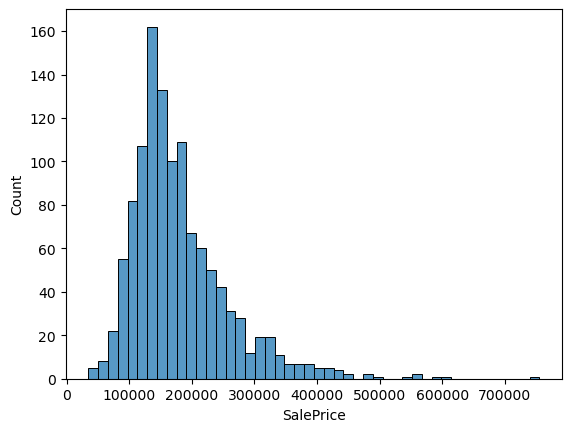




Columna: OverallQual
Media: 6.101027397260274
Valor mínimo: 1.0
Valor máximo: 10.0
Rango: 9.0
Desviación estándar: 1.3780252276191631


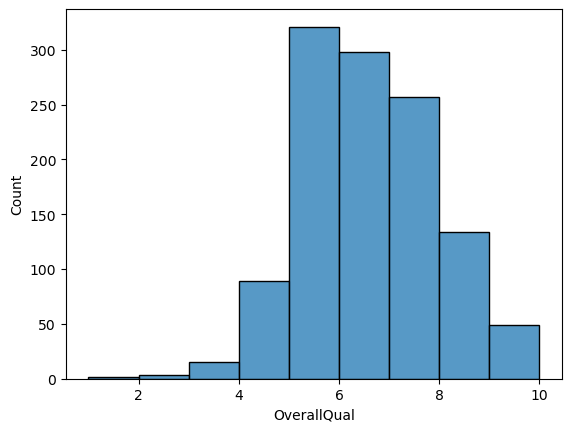




Columna: 1stFlrSF
Media: 1156.3236301369864
Valor mínimo: 334.0
Valor máximo: 3228.0
Rango: 2894.0
Desviación estándar: 373.7803744886528


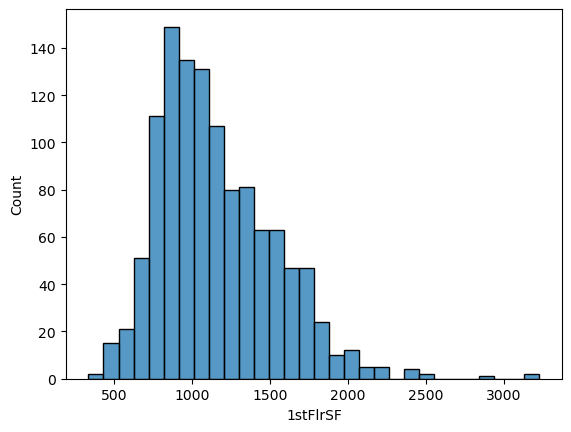




Columna: TotRmsAbvGrd
Media: 6.4854452054794525
Valor mínimo: 2.0
Valor máximo: 14.0
Rango: 12.0
Desviación estándar: 1.6091407087243883


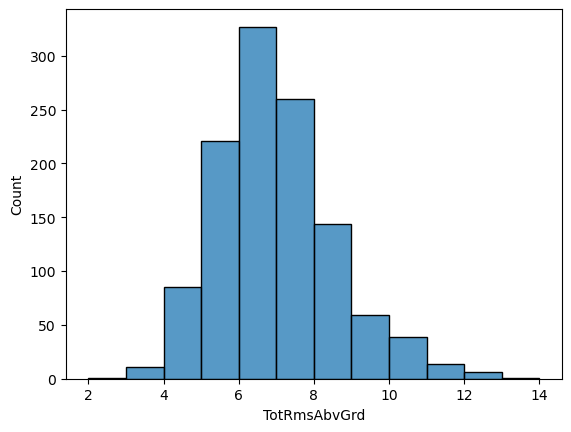




Columna: YearBuilt
Media: 1971.451198630137
Valor mínimo: 1875.0
Valor máximo: 2010.0
Rango: 135.0
Desviación estándar: 29.95170660645528


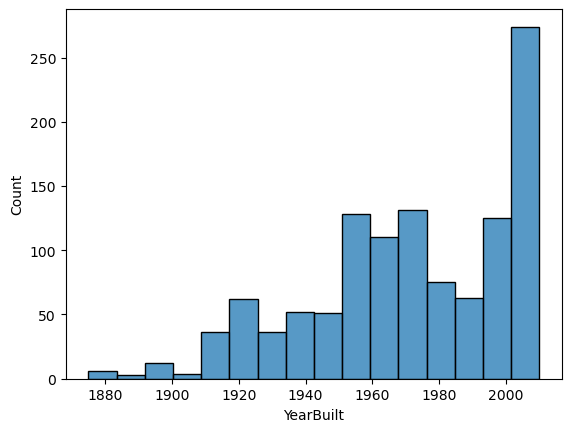




Columna: LotFrontage
Media: 69.94698544698545
Valor mínimo: 21.0
Valor máximo: 313.0
Rango: 292.0
Desviación estándar: 23.478160779049645


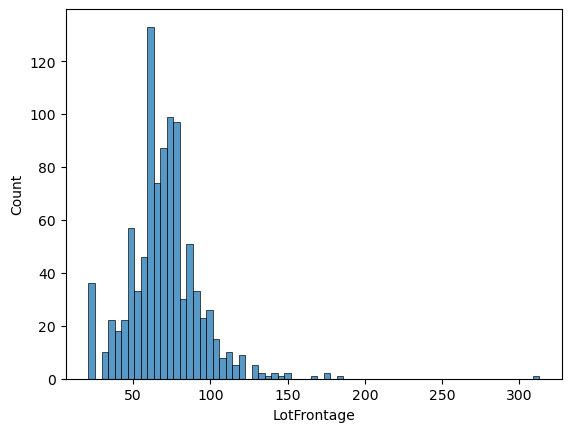

In [11]:
procesador_rl.mostrar_informacion_estadistica()

### _Selección de variables independientes con mayor potencial predictivo_

Variable independiente: OverallQual


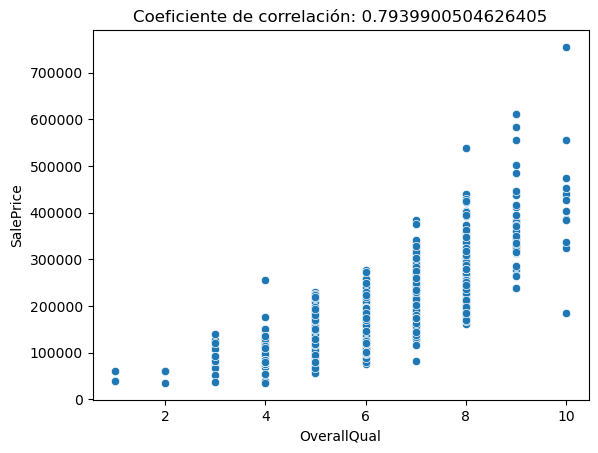

Variable independiente: 1stFlrSF


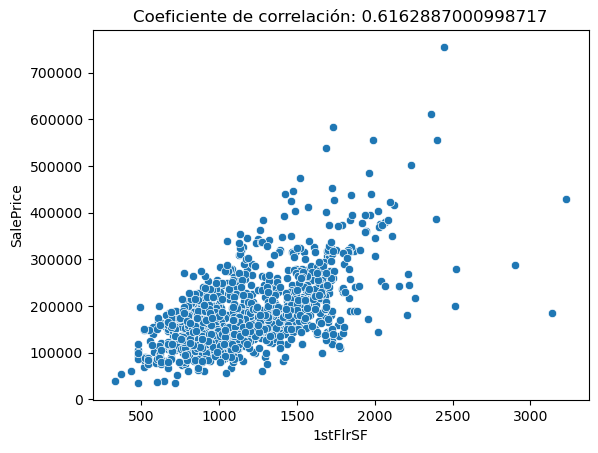

Variable independiente: TotRmsAbvGrd


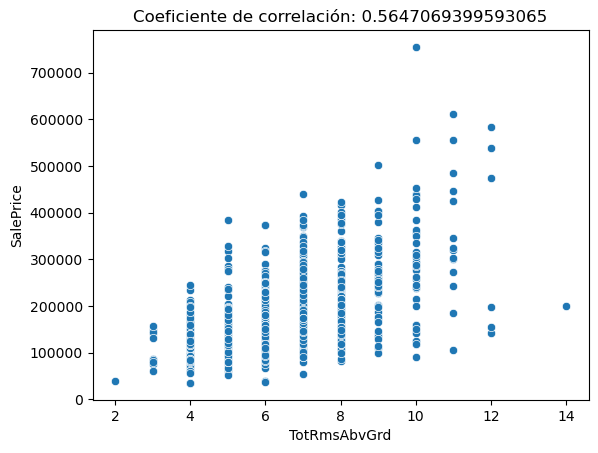

Variable independiente: YearBuilt


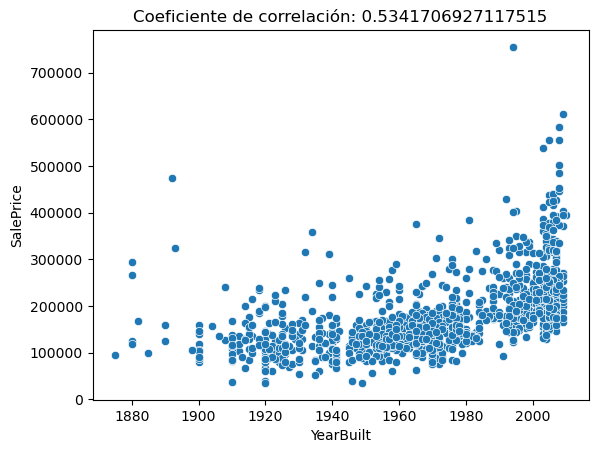

Variable independiente: LotFrontage


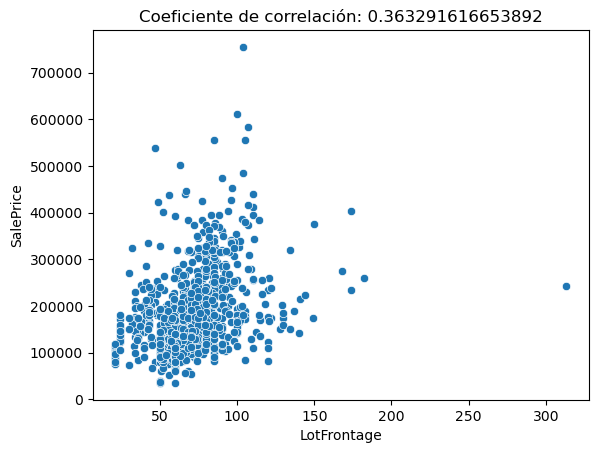



Las 2 variables con mayor potencial predictivo, son: ['OverallQual', '1stFlrSF']


In [12]:
var_predictivas = procesador_rl.analizar_variables_independientes('SalePrice')
print(f"\n\n{'=' * 80}\nLas 2 variables con mayor potencial predictivo, son: {var_predictivas}\n{'=' * 80}")

### _Entrenamiento manual del modelo_


Aplicando el modelo con variable independiente 'OverallQual'...

Error de la iteración 50: 11526323879.982763
Error de la iteración 100: 6854003250.871246
Error de la iteración 150: 4330748580.076285
Error de la iteración 200: 2965533630.0724373
Error de la iteración 250: 2224893311.452406
Error de la iteración 300: 1821544471.1041582
Error de la iteración 350: 1600683764.4619691
Error de la iteración 400: 1478820874.3987665
Error de la iteración 450: 1410868965.940866
Error de la iteración 500: 1372434862.2268744
Error de la iteración 550: 1350285996.8126369
Error de la iteración 600: 1337216706.614763
Error de la iteración 650: 1329281963.9525936
Error de la iteración 700: 1324305476.0685804
Error de la iteración 750: 1321074049.2423975
Error de la iteración 800: 1318901739.5899153
Error de la iteración 850: 1317393434.475827
Error de la iteración 900: 1316316125.9342902
Error de la iteración 950: 1315528444.079833
Error de la iteración 1000: 1314941791.5079408
Error de la iteración

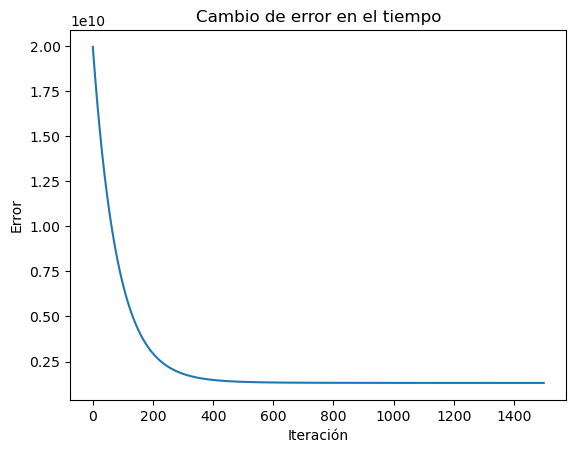

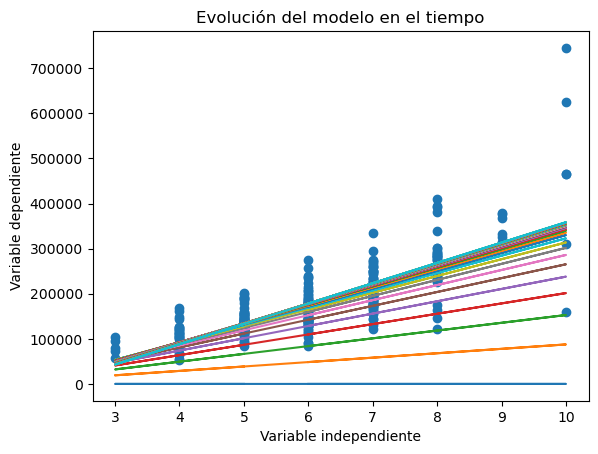

In [13]:
y = procesador_rl.df_pruebas['SalePrice']

epochs = 1500
alfa = 0.0498
error_cada = 50

x1 = procesador_rl.df_pruebas['OverallQual']
print
print(f"\n{'=' * 80}\nAplicando el modelo con variable independiente 'OverallQual'...\n{'=' * 80}\n")
modelos_x1, errores_x1 = procesador_rl.entrenar_modelo(x1, y, epochs, error_cada, alfa)
print("\n")

procesador_rl.graficar_error_en_tiempo(errores_x1)
procesador_rl.graficar_evolucion_modelo(modelos_x1, x1, y, 50)


Aplicando el modelo con variable independiente '1stFlrSF'...

Error de la iteración 4: 12876662700.418442
Error de la iteración 8: 7701977869.013638
Error de la iteración 12: 5086481287.856074
Error de la iteración 16: 3764502688.9099054
Error de la iteración 20: 3096320765.5864935
Error de la iteración 24: 2758594312.4875064
Error de la iteración 28: 2587893514.1110177
Error de la iteración 32: 2501614284.8995037
Error de la iteración 36: 2458005155.39289
Error de la iteración 40: 2435963232.310412
Error de la iteración 44: 2424822253.827556
Error de la iteración 48: 2419191056.76137
Error de la iteración 52: 2416344727.6470017
Error de la iteración 56: 2414905984.228481
Error de la iteración 60: 2414178691.954349
Error de la iteración 64: 2413810996.0674367
Error de la iteración 68: 2413625054.8417635
Error de la iteración 72: 2413530979.825195
Error de la iteración 76: 2413483337.7326937
Error de la iteración 80: 2413459164.731422
Error de la iteración 84: 2413446853.964901
Error d

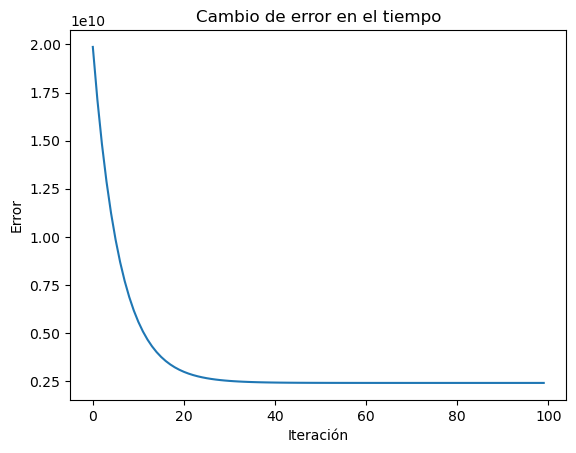

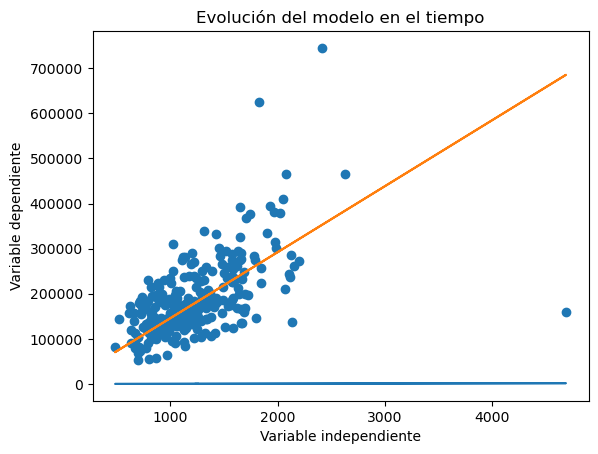

In [14]:
epochs = 100
alfa = 0.0000012
error_cada = 4

x2 = procesador_rl.df_pruebas['1stFlrSF']
print(f"\n{'=' * 80}\nAplicando el modelo con variable independiente '1stFlrSF'...\n{'=' * 80}\n")
modelos_x2, errores_x2 = procesador_rl.entrenar_modelo(x2, y, epochs, error_cada, alfa)

procesador_rl.graficar_error_en_tiempo(errores_x2)
procesador_rl.graficar_evolucion_modelo(modelos_x2, x2, y, 50)

### _Función para entrenar modelo con scikit-learn_

In [15]:
from sklearn.linear_model import LinearRegression

def entrenar_modelo_sklearn(x, y):
    x = x.reshape(-1, 1) #Asegura que x sea un array 2D
    
    modelo = LinearRegression()
    modelo.fit(x, y)
    
    return modelo

### _Función de predicción con ambos modelos_

In [16]:
def predecir_y_combinar(modelo_manual, modelo_sklearn, x):
    
    x = x.reshape(-1, 1) #Asegura que x sea un array 2D de NumPy
    
    pred_manual = modelo_manual[0] * x.flatten() + modelo_manual[1] #Se usa la función flatten() para asegurar que se opere un arreglo lineal
    
    pred_sklearn = modelo_sklearn.predict(x).flatten()
    
    pred_promedio = (pred_manual + pred_sklearn) / 2
    
    return pred_manual, pred_sklearn, pred_promedio

### _Uso de los datos de validación_

In [17]:
x1_pruebas = procesador_rl.df_pruebas['OverallQual'].values
x2_pruebas = procesador_rl.df_pruebas['1stFlrSF'].values
y_pruebas = procesador_rl.df_pruebas['SalePrice'].values

In [18]:
#Entraniento de los modelos para x1 y x2, usando scikit-learn
modelo_x1_sklearn = entrenar_modelo_sklearn(x1_pruebas, y)
modelo_x2_sklearn = entrenar_modelo_sklearn(x2_pruebas, y)

_Aplicación de los modelos y cálculos de error, usando la función de cálculo de error medio cuadrático de Scikit-learn:_

In [19]:
from sklearn.metrics import mean_squared_error

beta_manual_x1 = modelos_x1[max(modelos_x1.keys())]
beta_manual_x2 = modelos_x2[max(modelos_x2.keys())]

y_pred_x1_manual, y_pred_x1_sklearn, y_pred_x1_promedio = predecir_y_combinar(beta_manual_x1, modelo_x1_sklearn, x1_pruebas)
mse_x1_manual = mean_squared_error(y_pruebas, y_pred_x1_manual)
mse_x1_sklearn = mean_squared_error(y_pruebas, y_pred_x1_sklearn)
mse_x1_promedio = mean_squared_error(y_pruebas, y_pred_x1_promedio)

y_pred_x2_manual, y_pred_x2_sklearn, y_pred_x2_promedio = predecir_y_combinar(beta_manual_x2, modelo_x2_sklearn, x2_pruebas)
mse_x2_manual = mean_squared_error(y_pruebas, y_pred_x2_manual)
mse_x2_sklearn = mean_squared_error(y_pruebas, y_pred_x2_sklearn)
mse_x2_promedio = mean_squared_error(y_pruebas, y_pred_x2_promedio)

_Despliegue de resultados:_

Errores para la variable x1 'OverallQual':
MSE para el modelo manual: 2626301633.954487
MSE para el modelo scikit-learn: 2625977511.083424
MSE promedio: 2626058541.80119


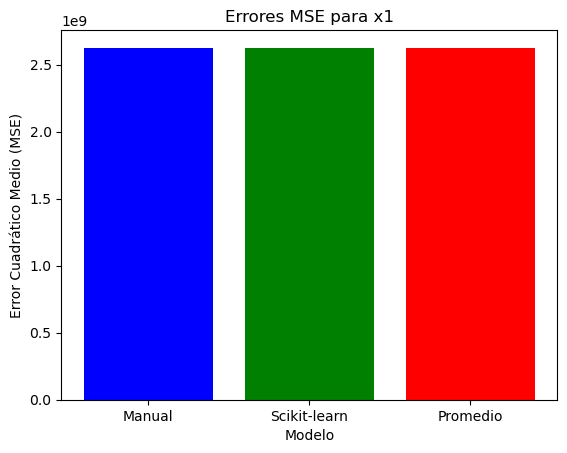

Errores para la variable x2 '1stFlrSF':
MSE para el modelo manual: 4826869044.977109
MSE para el modelo scikit-learn: 4493912134.451242
MSE promedio: 4577151362.082708


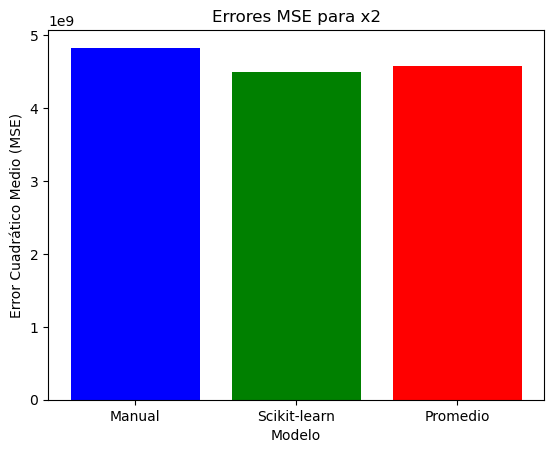

In [20]:
nombres_modelos = ['Manual', 'Scikit-learn', 'Promedio']

#Despliegue de los MSE y el gráfico comparativo para x1

print("Errores para la variable x1 'OverallQual':")
print("MSE para el modelo manual:", mse_x1_manual)
print("MSE para el modelo scikit-learn:", mse_x1_sklearn)
print("MSE promedio:", mse_x1_promedio)

mse_x1 = [mse_x1_manual, mse_x1_sklearn, mse_x1_promedio]
# Crear gráfico de barras, comparando el error de los modelos
plt.bar(nombres_modelos, mse_x1, color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Errores MSE para x1')
plt.show()

#Despliegue de los MSE y el gráfico comparativo para x2

print("Errores para la variable x2 '1stFlrSF':")
print("MSE para el modelo manual:", mse_x2_manual)
print("MSE para el modelo scikit-learn:", mse_x2_sklearn)
print("MSE promedio:", mse_x2_promedio)

mse_x2 = [mse_x2_manual, mse_x2_sklearn, mse_x2_promedio]
# Crear gráfico de barras, comparando el error de los modelos
plt.bar(nombres_modelos, mse_x2, color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Errores MSE para x2')
plt.show()